In [3]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

In [4]:
from keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [5]:
from keras.utils import to_categorical

Training data shape :  (50000, 32, 32, 3) (50000, 1)
Testing data shape :  (10000, 32, 32, 3) (10000, 1)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : [3]')

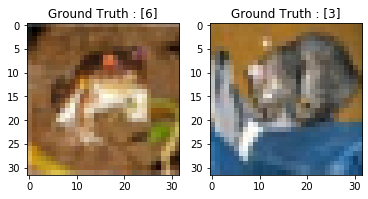

In [7]:
print('Training data shape : ', train_images.shape, train_labels.shape)

print('Testing data shape : ', test_images.shape, test_labels.shape)

# Find the unique numbers from the train labels
classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]))

### Preprocess the Data

Perform normalization of data and convert the labels to categorical variables to be used in Keras


In [8]:
# Find the shape of input images and create the variable input_shape
nRows,nCols,nDims = train_images.shape[1:]
train_data = train_images.reshape(train_images.shape[0], nRows, nCols, nDims)
test_data = test_images.reshape(test_images.shape[0], nRows, nCols, nDims)
input_shape = (nRows, nCols, nDims)

# Change to float datatype
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

# Scale the data to lie between 0 to 1
train_data /= 255
test_data /= 255

# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [13]:
# Display the change for category label using one-hot encoding
print('Original label 0 : ', train_labels[0])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[0])

Original label 0 :  [6]
After conversion to categorical ( one-hot ) :  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


### Define the model
Create the model with conv layer, max pooling layer, dropout layer and Dense layer

In [15]:
def create_model():
    model = Sequential()
    
    # The first two layers with 32 filters of window size 3x3
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nClasses, activation='softmax'))
    
    return model

### Train the model

In [17]:
alexnet = create_model()
batch_size = 256
epochs = 50
alexnet.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

alexnet.summary()

history = alexnet.fit(train_data, train_labels_one_hot, batch_size=batch_size, epochs=epochs, verbose=1, 
                   validation_data=(test_data, test_labels_one_hot))
alexnet.evaluate(test_data, test_labels_one_hot)

W0227 10:42:23.941047 140089784088384 deprecation_wrapper.py:119] From /home/wonchul/.virtualenvs/p3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0227 10:42:23.968779 140089784088384 deprecation_wrapper.py:119] From /home/wonchul/.virtualenvs/p3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0227 10:42:23.971591 140089784088384 deprecation_wrapper.py:119] From /home/wonchul/.virtualenvs/p3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0227 10:42:23.990299 140089784088384 deprecation_wrapper.py:119] From /home/wonchul/.virtualenvs/p3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
__________

Epoch 42/50
50000/50000 [==============================] - 38s 759us/step - loss: 0.4921 - acc: 0.8314 - val_loss: 0.6911 - val_acc: 0.7810
Epoch 43/50
50000/50000 [==============================] - 38s 766us/step - loss: 0.4893 - acc: 0.8340 - val_loss: 0.7936 - val_acc: 0.7641
Epoch 44/50
50000/50000 [==============================] - 38s 761us/step - loss: 0.4869 - acc: 0.8306 - val_loss: 0.6958 - val_acc: 0.7887
Epoch 45/50
50000/50000 [==============================] - 38s 763us/step - loss: 0.4770 - acc: 0.8366 - val_loss: 0.6505 - val_acc: 0.7935
Epoch 46/50
50000/50000 [==============================] - 38s 754us/step - loss: 0.4770 - acc: 0.8368 - val_loss: 0.6926 - val_acc: 0.7849
Epoch 47/50
50000/50000 [==============================] - 38s 751us/step - loss: 0.4759 - acc: 0.8368 - val_loss: 0.6574 - val_acc: 0.7979
Epoch 48/50
50000/50000 [==============================] - 38s 755us/step - loss: 0.4731 - acc: 0.8396 - val_loss: 0.6200 - val_acc: 0.8063
Epoch 49/50
50000/50

[0.6801332611560822, 0.7956]

Text(0.5, 1.0, 'Accuracy Curves')

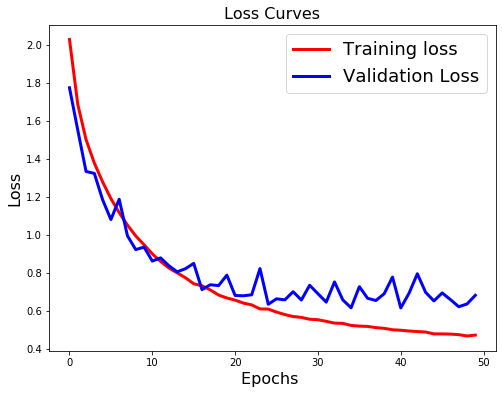

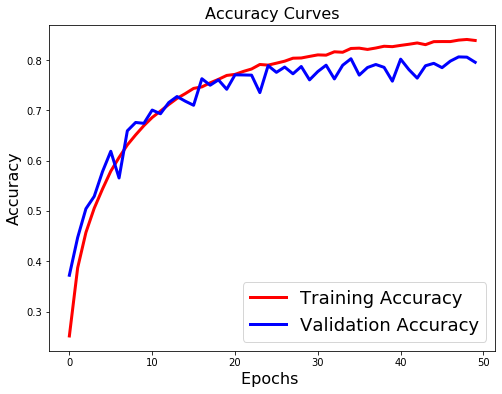

In [18]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

### Train using Data Augmentation

Here we use the ImageDataGenerator class in Keras to perform Data Augmentation. We perform horizontal and vertical shift of the image and also flipping the image randomly.


In [20]:
from keras.preprocessing.image import ImageDataGenerator

model2 = create_model()

model2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

batch_size = 256
epochs = 50
datagen = ImageDataGenerator(
#         zoom_range=0.2, # randomly zoom into images
#         rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


# datagen.fit(train_data)

# Fit the model on the batches generated by datagen.flow().
history2 = model2.fit_generator(datagen.flow(train_data, train_labels_one_hot, batch_size=batch_size),
                              steps_per_epoch=int(np.ceil(train_data.shape[0] / float(batch_size))),
                              epochs=epochs,
                              validation_data=(test_data, test_labels_one_hot),
                              workers=4)

model2.evaluate(test_data, test_labels_one_hot)

Epoch 1/50
196/196 [==============================] - 39s 199ms/step - loss: 2.0676 - acc: 0.2346 - val_loss: 1.8539 - val_acc: 0.2958
Epoch 2/50
196/196 [==============================] - 38s 196ms/step - loss: 1.7510 - acc: 0.3616 - val_loss: 1.5907 - val_acc: 0.4039
Epoch 3/50
196/196 [==============================] - 38s 195ms/step - loss: 1.6022 - acc: 0.4167 - val_loss: 1.4039 - val_acc: 0.4900
Epoch 4/50
196/196 [==============================] - 39s 197ms/step - loss: 1.4806 - acc: 0.4668 - val_loss: 1.4866 - val_acc: 0.4623
Epoch 5/50
196/196 [==============================] - 41s 209ms/step - loss: 1.3928 - acc: 0.5021 - val_loss: 1.4261 - val_acc: 0.4997
Epoch 6/50
196/196 [==============================] - 40s 202ms/step - loss: 1.3167 - acc: 0.5310 - val_loss: 1.3201 - val_acc: 0.5342
Epoch 7/50
196/196 [==============================] - 41s 211ms/step - loss: 1.2628 - acc: 0.5496 - val_loss: 1.1383 - val_acc: 0.5860
Epoch 8/50
196/196 [==============================] - 4

[0.6542333606719971, 0.7751]

Text(0.5, 1.0, 'Accuracy Curves')

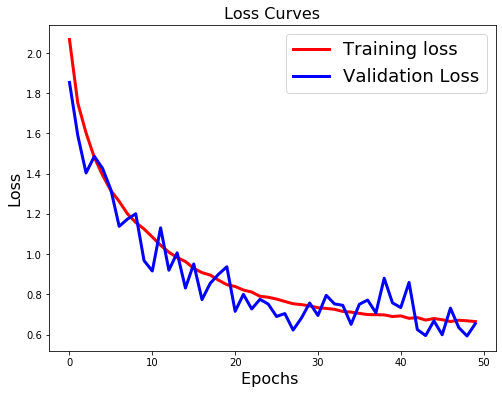

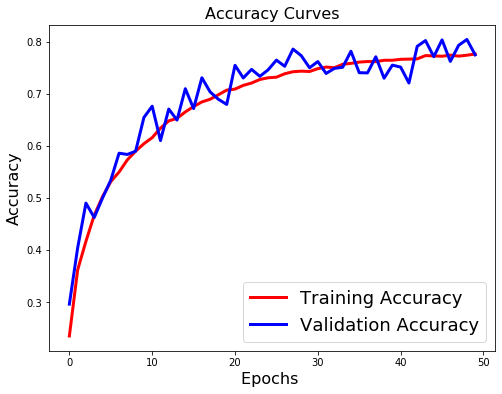

In [21]:
plt.figure(figsize=[8,6])
plt.plot(history2.history['loss'],'r',linewidth=3.0)
plt.plot(history2.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

plt.figure(figsize=[8,6])
plt.plot(history2.history['acc'],'r',linewidth=3.0)
plt.plot(history2.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)